# Changing predictor/exogenous to anomaly domain

In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde

machine = 'local'

if machine == 'snellius':
    regionsfile = '/gpfs/home5/awoude/Ritten/EKF/regions.nc' # Contains the data on the distribution of ecoregions
elif machine == 'local':
    regionsfile = './data_files/regions.nc' # Contains the data on the distribution of ecoregions

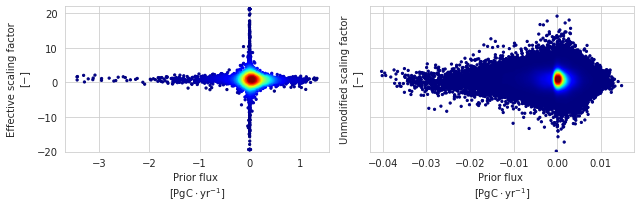

In [4]:
# Source: https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib
# set x and y values

# ---------------------- First figure -------------------
with xr.open_dataset('./vars_per_eco_update.nc') as ds:
    remaining_vars = ds[[
                    'prior_flux_per_s', 'sf_per_eco']]

fac= 86400.*365.*12./1e15 # from mol/region/s to PgC/yr

x = remaining_vars.prior_flux_per_s.isel(time=slice(0,52)).values.flatten()*fac
y = remaining_vars.sf_per_eco.isel(time=slice(0,52)).values.flatten()

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots(1, 2, figsize=(9,3), sharey=True)
ax[0].scatter(x, y, c=z, s=5, cmap='jet')

ax[0].set_ylim(-20, 22)
ax[0].set_ylabel('Effective scaling factor\n'r'[$-$]')
ax[0].set_xlabel('Prior flux \n'r'[$\mathrm{PgC\cdot yr^{-1}}$]')

# ------------------ Second figure -------------------------
# Define which transcom regions should be included in the plot. Onl use those that are alo included in the effective scaling factor
included_trans_regions = [1.0, 2.0, 7.0, 8.0, 11.0] # corresponds to 'North American Boreal', 'North American Temperate', 'Eurasia Boreal', 'Eurasia Temperate', 'Europe'

# Use the region files to find the ecoregions within the selected transcom regions
with xr.open_dataset('./data_files/griddedNHparameters.nc') as ds:
    region_ds = ds[['regions', 'transcom_regions']]


needed_sv_elems = {}
for tc_region in included_trans_regions:
    needed_sv_elems[tc_region] = np.unique(region_ds.where(region_ds.transcom_regions == tc_region).regions.values)
needed_sv_elems = np.concatenate(list(needed_sv_elems.values()))


with xr.open_dataset('./data_files/weekly_flux.nc') as ds:
    flux_dat = ds.prior_flux.isel(time=slice(0,52)).assign_coords(regions=np.unique(region_ds.regions))

with xr.open_dataset('./data_files/weekly_sv.nc') as ds:
    sf_dat = ds.flux_multiplier_m.transpose().isel(time=slice(0,52)).assign_coords(regions=np.unique(region_ds.regions))


dropped_sv_elems = set(sf_dat.regions.values)-set(needed_sv_elems)

flux_dat = flux_dat.drop_sel(regions=list(dropped_sv_elems))
sf_dat = sf_dat.drop_sel(regions=list(dropped_sv_elems))

x = flux_dat.values.flatten()
y = sf_dat.values.flatten()

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

ax[1].scatter(x, y, c=z, s=5, cmap='jet')

ax[1].set_ylim(-20, 22)

ax[1].set_ylabel('Unmodified scaling factor\n'r'[$-$]')
ax[1].set_xlabel('Prior flux \n'r'[$\mathrm{PgC\cdot yr^{-1}}$]')

# plt.title("All effective scaling factors vs. prior fluxes")
# plt.xlabel('Prior flux')
plt.tight_layout()
# plt.ylabel('Scaling factor')
plt.savefig('../figures/corr_prior_flux_(e)sf.png')
#
plt.savefig('../figures/corr_prior_flux_(e)sf.pdf')
plt.show()

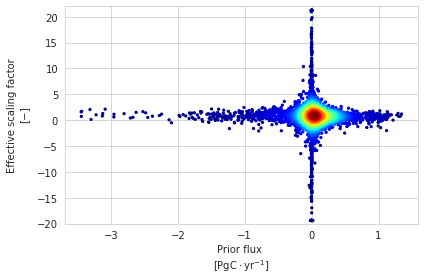

In [4]:
with xr.open_dataset('./vars_per_eco_update.nc') as ds:
    remaining_vars = ds[[
                    'prior_flux_per_s', 'sf_per_eco']]

fac= 86400.*365.*12./1e15 # from mol/region/s to PgC/yr

x = remaining_vars.prior_flux_per_s.isel(time=slice(0,52)).values.flatten()*fac
y = remaining_vars.sf_per_eco.isel(time=slice(0,52)).values.flatten()

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=5, cmap='jet')

ax.set_ylim(-20, 22)
ax.set_ylabel('Effective scaling factor\n'r'[$-$]')
ax.set_xlabel('Prior flux \n'r'[$\mathrm{PgC\cdot yr^{-1}}$]')
plt.tight_layout()
plt.savefig('../figures/corr_prior_esf.pdf')
plt.show()


In [84]:
# Define which transcom regions should be included in the plot.
included_trans_regions = [1.0, 2.0, 7.0, 8.0, 11.0] # corresponds to 'North American Boreal', 'North American Temperate', 'Eurasia Boreal', 'Eurasia Temperate', 'Europe'

# Use the region files to find the ecoregions within the selected transcom regions
with xr.open_dataset('./data_files/griddedNHparameters.nc') as ds:
    region_ds = ds[['regions', 'transcom_regions']]

# tc_names = [b''.join(n).decode().strip() for n in region_ds.transcom_names.values]
# trans_filter = [name in included_trans_regions for name in tc_names]
needed_sv_elems = {}
for tc_region in included_trans_regions:
    needed_sv_elems[tc_region] = np.unique(region_ds.where(region_ds.transcom_regions == tc_region).regions.values)
needed_sv_elems = np.concatenate(list(needed_sv_elems.values()))

In [143]:
# print(np.unique(filtered_regions.regions.values))
with xr.open_dataset('./data_files/weekly_flux.nc') as ds:
    flux_dat = ds.prior_flux.isel(time=slice(0,52)).assign_coords(regions=np.unique(region_ds.regions))

with xr.open_dataset('./data_files/weekly_sv.nc') as ds:
    sf_dat = ds.flux_multiplier_m.transpose().isel(time=slice(0,52)).assign_coords(regions=np.unique(region_ds.regions))


dropped_sv_elems = set(sf_dat.regions.values)-set(needed_sv_elems)

flux_dat = flux_dat.drop_sel(regions=list(dropped_sv_elems))
sf_dat = sf_dat.drop_sel(regions=list(dropped_sv_elems))

<xarray.DataArray 'flux_multiplier_m' (regions: 9690, time: 52)>
[503880 values with dtype=float64]
Coordinates:
  * regions  (regions) float32 1.0 2.0 3.0 4.0 ... 9.688e+03 9.689e+03 9.69e+03
  * time     (time) datetime64[ns] 2000-01-01 2000-01-08 ... 2000-12-23
Attributes:
    Description:  Weekly analysed state vector
    Units:        None
<xarray.DataArray 'prior_flux' (regions: 9690, time: 52)>
[503880 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-08 ... 2000-12-23
  * regions  (regions) float32 1.0 2.0 3.0 4.0 ... 9.688e+03 9.689e+03 9.69e+03


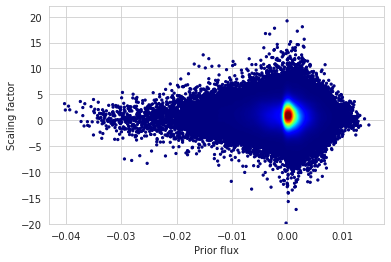

In [147]:
# with xr.open_dataset('./data_files/weekly_flux.nc') as ds:
#     flux_dat = ds.prior_flux.isel(time=slice(0,52))
#
# with xr.open_dataset('./data_files/weekly_sv.nc') as ds:
#     sf_dat = ds.flux_multiplier_m.transpose().isel(time=slice(0,52))

print(sf_dat)
print(flux_dat)

x = flux_dat.values.flatten()
y = sf_dat.values.flatten()

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=5, cmap='jet')

ax.set_ylim(-20, 22)

# plt.title("S vs. prior fluxes")
plt.xlabel('Prior flux')
plt.ylabel('Scaling factor')
plt.savefig('./figures/corr_prior_flux_sv.png')
plt.show()

In [5]:
with xr.open_dataset('./vars_per_eco_update.nc') as ds:
    print(np.unique(ds.TER))

[0.00000000e+00 2.86281059e+06 9.98454009e+06 ... 1.17214773e+11
 1.17934945e+11            nan]


# The discontinued project of moving to monthly statevector approximations

Belong is code that transforms both the state-vector and the exogenous variables to monthly values instead of weekly values. This is not used within the thesis, but considered a possible improvement. Use it as you please

In [ ]:
# def to_monthly(data):
#     data.resample

with xr.open_dataset('./vars_per_eco_update.nc') as ds:
    pred_dat = ds.drop_vars(['regions', 'grid_cell_weight', 'grid_cell_area', 'TER', 'scaling_factor', 'eco_area'])
    remaining_vars = ds[[
                    'monthly_flux', 'smoothed_flux', 'opt_flux', 'prior_flux_per_s', 'sf_per_eco', 'monthly_sf', 'smoothed_sf',
                    'regions', 'grid_cell_weight', 'grid_cell_area', 'TER', 'monthly_flux', 'smoothed_flux', 'opt_flux',
                    'prior_flux_per_s', 'scaling_factor', 'sf_per_eco', 'monthly_sf', 'smoothed_sf', 'eco_area']]

ds_monthly_new = pred_dat.resample(time="MS").mean(dim="time")
year_month_idx = pd.MultiIndex.from_arrays([pred_dat.time.dt.year.values, pred_dat.time.dt.month.values])
pred_dat.coords['year_month'] = ('time', year_month_idx)
ds_monthly_old = pred_dat.groupby('year_month').mean()
year_month_idx_single_var = ['{}_{}'.format(i, j) for i, j in ds_monthly_old.year_month.values]
year_month = pd.to_datetime(year_month_idx_single_var, format="%Y_%m")
ds_monthly_old = ds_monthly_old.assign_coords(year_month=year_month)
print(ds_monthly_old)
# ds_monthly_old = ds_monthly_old.unstack("year_month")
# ds_monthly_old = ds_monthly_old.rename_dims({'time_level_0':'year', 'time_level_1':'month'})
# # ds_monthly_old['year_month'] = year_month_idx_single_var
# ds_monthly_old = ds_monthly_old.stack(time=("year", "month"))
# ds_monthly_old['year_month_var'] = year_month_idx_single_var#xr.DataArray(data=year_month_idx_single_var, dims=)
# print(ds_monthly_old)
# print(ds_monthly_new)

In [ ]:
# A plot for comparing the behavior of the prior flux to the behavior of the scaling factor. Note that most peaks in the scaling-factor occur when the prior flux is close to 0

region=7.0
fig,ax = plt.subplots(figsize=(10,10))
ds_monthly_old.opt_flux.loc[dict(eco_regions=region, year_month=slice('2014', '2018'))].plot(ax=ax, label='flux', c='C01')
ax.set_ylim(-3.5e6, 3.5e6)
# plt.show()
ax2=ax.twinx()
eff_sf = ds_monthly_old.opt_flux/ds_monthly_old.prior_flux_per_s
eff_sf.loc[dict(eco_regions=region, year_month=slice('2014', '2018'))].plot(ax=ax2, label='sf', c='C02', linestyle='--', alpha=0.5)
ax2.set_ylim(-10, 10)
plt.legend()
plt.show()
ds_monthly_old.sf_per_eco.loc[dict(eco_regions=region)].plot()
plt.show()
pred_dat.sf_per_eco.loc[dict(eco_regions=region)].plot()
plt.show()

(-3.0, 5.0)

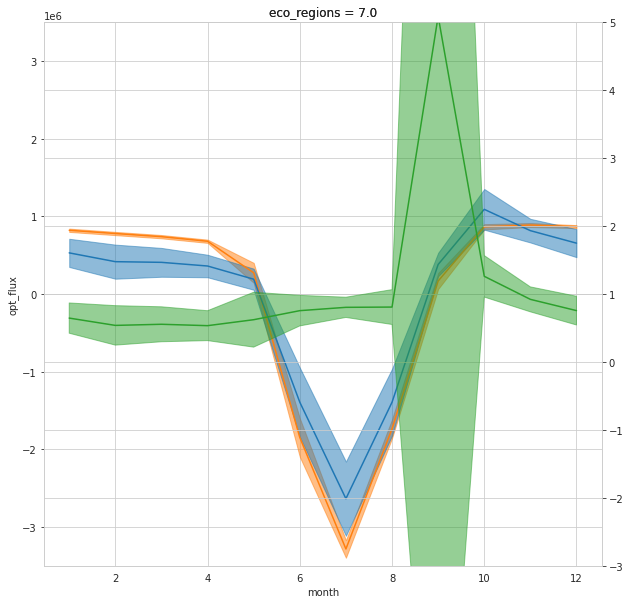

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

mean_monthly_prior_flux = ds_monthly_old.prior_flux_per_s.groupby(ds_monthly_old.year_month.dt.month).mean().loc[dict(eco_regions=region)]
std_monthly_prior_flux = ds_monthly_old.prior_flux_per_s.groupby(ds_monthly_old.year_month.dt.month).std().loc[dict(eco_regions=region)]

mean_monthly_prior_flux.plot(ax=ax, c='C01')

ax.fill_between(std_monthly_prior_flux.month, mean_monthly_prior_flux-std_monthly_prior_flux, mean_monthly_prior_flux+std_monthly_prior_flux,
                 alpha=0.5, label=r'$\sigma=1$', color='C01')


mean_monthly_opt_flux = ds_monthly_old.opt_flux.groupby(ds_monthly_old.year_month.dt.month).mean().loc[dict(eco_regions=region)]
std_monthly_opt_flux = ds_monthly_old.opt_flux.groupby(ds_monthly_old.year_month.dt.month).std().loc[dict(eco_regions=region)]

mean_monthly_opt_flux.plot(ax=ax, c='C00')

ax.fill_between(std_monthly_opt_flux.month, mean_monthly_opt_flux-std_monthly_opt_flux, mean_monthly_opt_flux+std_monthly_opt_flux,
                 alpha=0.5, label=r'$\sigma=1$', color='C00')
ax.set_ylim(-3.5e6, 3.5e6)

ax2 = ax.twinx()
mean_monthly_sf = eff_sf.groupby(eff_sf.year_month.dt.month).mean().loc[dict(eco_regions=region)]
std_monthly_sf = eff_sf.groupby(eff_sf.year_month.dt.month).std().loc[dict(eco_regions=region)]
mean_monthly_sf.plot(ax=ax2, c='C02')

ax2.fill_between(std_monthly_sf.month, mean_monthly_sf-std_monthly_sf, mean_monthly_sf+std_monthly_sf,
                 alpha=0.5, label=r'$\sigma=1$', color='C02')
ax2.set_ylim(-3, 5)


In [9]:
print(eff_sf.mean())

<xarray.DataArray ()>
array(0.95699, dtype=float32)


In [6]:
outside = np.sum(pred_dat.sf_per_eco.where(np.abs(pred_dat.sf_per_eco)>4).count(dim="time"))
inside = np.sum(pred_dat.sf_per_eco.where(np.abs(pred_dat.sf_per_eco)<=4).count(dim="time"))


print(f'outside [-4,4] band {outside}, ratio of total: {outside/(outside+inside)}')
print(f'inside [-4,4] band {inside}, ratio of total: {inside/(outside+inside)}')


outside [-4,4] band 8913, ratio of total: 0.11959263632460283
inside [-4,4] band 65615, ratio of total: 0.8804073636753972


In [7]:
outside = np.sum(eff_sf.where(np.abs(eff_sf)>4).count(dim="year_month"))
inside = np.sum(eff_sf.where(np.abs(eff_sf)<=4).count(dim="year_month"))


print(f'outside [-4,4] band {outside}, ratio of total: {outside/(outside+inside)}')
print(f'inside [-4,4] band {inside}, ratio of total: {inside/(outside+inside)}')


outside [-4,4] band 1303, ratio of total: 0.07603874883286647
inside [-4,4] band 15833, ratio of total: 0.9239612511671336


In [8]:
print(len(eff_sf.where(np.abs(eff_sf)>4, drop=True).values))
print(len(eff_sf.where(np.abs(eff_sf)<4, drop=True).values))


248
252


In [8]:
std = eff_sf.std()
mean = eff_sf.mean()
eff_sf_capped = eff_sf.where(eff_sf < mean+std, mean+std)
eff_sf_capped = eff_sf_capped.where(eff_sf>mean-std, mean-std)

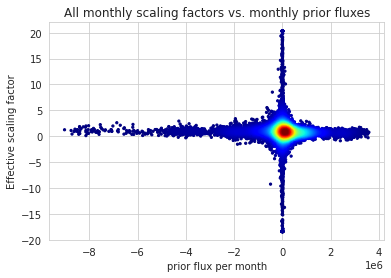

In [9]:
# Source: https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib

# Generate fake data
x = ds_monthly_old.prior_flux_per_s.values.flatten()
y=eff_sf_capped.values.flatten()

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=5, cmap='jet')

ax.set_ylim(-20, 22)

plt.title("All monthly scaling factors vs. monthly prior fluxes")
plt.xlabel('prior flux per month')
plt.ylabel('Effective scaling factor')
plt.show()

<AxesSubplot:>

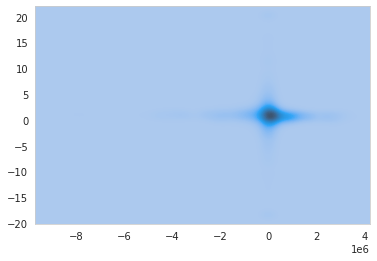

In [98]:
import seaborn as sns
sns.kdeplot(
    x=ds_monthly_old.prior_flux_per_s.stack(z=['year_month', 'eco_regions']).values, y=eff_sf_capped.stack(z=['year_month', 'eco_regions']).values,
    fill=True, thresh=0, levels=100,
)

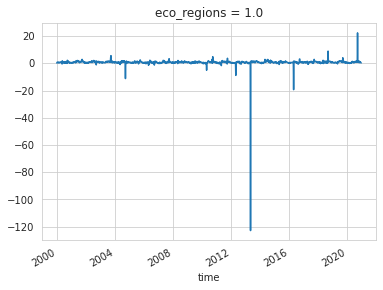

In [57]:
effective_sf = pred_dat.opt_flux/pred_dat.prior_flux_per_s
effective_sf.loc[dict(eco_regions=1.0)].plot()

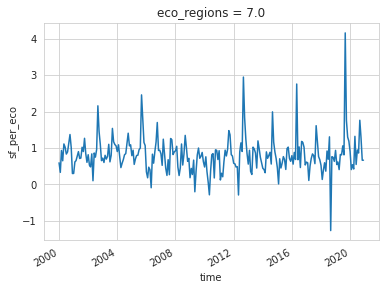

In [19]:
pred_dat.sf_per_eco.loc[dict(eco_regions=1.0)].plot()

In [2]:
def to_anomaly(data, rolling = 11):
    """
    If no previously trained model is available, or if the available save file is corrupted, a new model needs to be
    trained.
    :param train_dat: Data needed for training the model
    :return: A trained model
    """

    grouped_data = data.groupby('time.month')

    # mean = grouped_data.rolling(time=11*52, min_periods=1).mean()
    anomaly_per_month = {}
    monthly_mean_dict = {}
    for month, data in grouped_data:
        # print(data.to_dataframe())
        df = data.to_dataframe()
        monthly_rolling_mean = {}
        for region, eco_dat in df.groupby('eco_regions'):
            eco_dat = eco_dat.reset_index(level='eco_regions').drop(['eco_regions'], axis=1)
            monthly_rolling_mean[region] = eco_dat.rolling(str(rolling*365.25)+'D', min_periods=1).mean()


        monthly_mean_ds = xr.concat([df.to_xarray() for df in monthly_rolling_mean.values()], dim=pd.Index(data=monthly_rolling_mean.keys(), name="eco_regions"))
        monthly_mean_dict[month] = monthly_mean_ds
        anomaly_per_month[month]=data-monthly_mean_ds
    monthly_anomaly = xr.concat(anomaly_per_month.values(), dim='time').sortby('time')
    # monthly_mean = xr.concat(monthly_mean_dict.values(), dim= 'time').sortby('time')
        #
        # for value in :
        #     print(type(value))
        # month_data = xr.DataArray(
        #     data = monthly_rolling_mean.values(),
        #     dims = ["time", "eco_regions"],
        #     coords = dict(time=eco_dat.index,
        #                   eco_regions=monthly_rolling_mean.keys()))
        # print(month_data)
        # print(rolling_mean)
    return monthly_anomaly # , monthly_mean

Data variables:
    regions    (lat, lon) float32 ...
    g10m_MAX   (eco_regions, time) float64 ...
    swvl1_MIN  (eco_regions, time) float64 ...
    swvl1_MAX  (eco_regions, time) float64 ...
    slhf_MIN   (eco_regions, time) float64 ...
    slhf_MAX   (eco_regions, time) float64 ...
    slhf_AVG   (eco_regions, time) float64 ...
    sshf_MIN   (eco_regions, time) float64 ...
    sshf_MAX   (eco_regions, time) float64 ...
    sshf_AVG   (eco_regions, time) float64 ...
    ssrd_MIN   (eco_regions, time) float64 ...
    ssrd_MAX   (eco_regions, time) float64 ...
    ssrd_AVG   (eco_regions, time) float64 ...
    u10m_AVG   (eco_regions, time) float64 ...
    v10m_AVG   (eco_regions, time) float64 ...
    blh_MAX    (eco_regions, time) float64 ...
    d2m_MIN    (eco_regions, time) float64 ...
    d2m_MAX    (eco_regions, time) float64 ...
    d2m_AVG    (eco_regions, time) float64 ...
    lsp_SUM    (eco_regions, time) float64 ...
    skt_MIN    (eco_regions, time) float64 ...
    sk

In [3]:
# data.rolling(time=11*52, min_periods=1).mean()

with xr.open_dataset('./vars_per_eco_update.nc') as ds:
    pred_dat = ds.drop_vars(['regions', 'grid_cell_weight', 'grid_cell_area', 'TER', 'monthly_flux', 'smoothed_flux', 'opt_flux',
                    'prior_flux_per_s', 'scaling_factor', 'sf_per_eco', 'monthly_sf', 'smoothed_sf', 'eco_area'])
    remaining_vars = ds[['regions', 'grid_cell_weight', 'grid_cell_area', 'TER', 'monthly_flux', 'smoothed_flux', 'opt_flux',
                    'prior_flux_per_s', 'scaling_factor', 'sf_per_eco', 'monthly_sf', 'smoothed_sf', 'eco_area']]
print(pred_dat.data_vars)
anomaly_data = to_anomaly(pred_dat[list(pred_dat.data_vars)[:37]]) # , mean_data

print(anomaly_data)
# print(mean_data)

Data variables:
    g10m_MAX   (eco_regions, time) float64 ...
    swvl1_MIN  (eco_regions, time) float64 ...
    swvl1_MAX  (eco_regions, time) float64 ...
    slhf_MIN   (eco_regions, time) float64 ...
    slhf_MAX   (eco_regions, time) float64 ...
    slhf_AVG   (eco_regions, time) float64 ...
    sshf_MIN   (eco_regions, time) float64 ...
    sshf_MAX   (eco_regions, time) float64 ...
    sshf_AVG   (eco_regions, time) float64 ...
    ssrd_MIN   (eco_regions, time) float64 ...
    ssrd_MAX   (eco_regions, time) float64 ...
    ssrd_AVG   (eco_regions, time) float64 ...
    u10m_AVG   (eco_regions, time) float64 ...
    v10m_AVG   (eco_regions, time) float64 ...
    blh_MAX    (eco_regions, time) float64 ...
    d2m_MIN    (eco_regions, time) float64 ...
    d2m_MAX    (eco_regions, time) float64 ...
    d2m_AVG    (eco_regions, time) float64 ...
    lsp_SUM    (eco_regions, time) float64 ...
    skt_MIN    (eco_regions, time) float64 ...
    skt_MAX    (eco_regions, time) float64 .

In [10]:
new_var_ds = xr.merge([remaining_vars, anomaly_data])

file_name= './vars_per_eco_monthly_anomaly.nc'
with open(file_name, 'wb') as out:
    new_var_ds.to_netcdf(out)

In [33]:
new_var_ds.loc[dict(eco_regions=1.0)][['t2m_AVG']].to_array().values[0]


array([ 0.        ,  0.27920147, -1.93505221, ..., -2.14246015,
        1.53903479,  1.33842115])

Text(0.5, 1.0, 'Mean temperature 2016-2018 European crops')

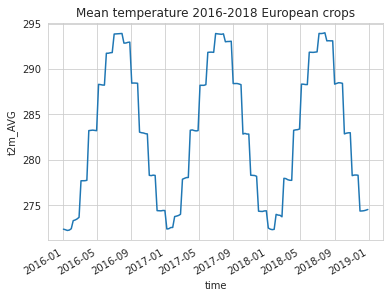

In [28]:
mean_data['t2m_AVG'].sel(dict(eco_regions="204.0", time=slice("2016-01-01", "2019-01-01"))).plot()
plt.title('Mean temperature 2016-2018 European crops')

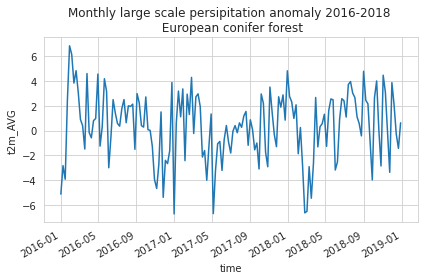

In [40]:
anomaly_data['t2m_AVG'].sel(dict(eco_regions="191.0", time=slice("2016-01-01", "2019-01-01"))).plot()
plt.title('Monthly large scale persipitation anomaly 2016-2018 \n European conifer forest')
plt.tight_layout()

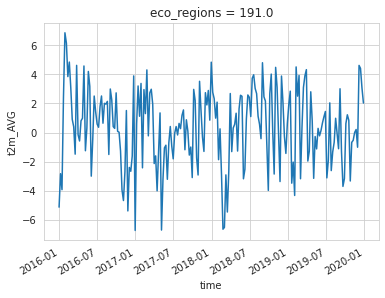

In [13]:
anomaly_data['t2m_AVG'].sel(dict(eco_regions="191.0", time=slice("2016-01-01", "2020-01-01"))).plot()